# Coursera Capstone Project

This notebook contains the code for the Coursera Capstone Project on Data Science by IBM and Coursera

### Importing required libraries

In [22]:
# Download beautifulsoup4 library for webscraping, if not installed
# !conda install beautifulsoup4

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import csv 
import geocoder 
import time, random
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_localities_in_Nagpur').text 
soup = BeautifulSoup(source, 'lxml')

### Initializing the `csv_writer` object and writing the name of the columns on it as the first row

In [3]:
csv_file = open('Nagpur.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

### Scraping the page to extracting the list of neighbourhoods in Nagpur and Saving them in CSV

In [4]:
list_items = soup.find_all('li')
list_items

for i in list_items[0:42]:
    temp = i.text.replace('\n','')
    print(temp)
    csv_writer.writerow([temp]) 
csv_file.close()

Mahal — The oldest locality in Nagpur. Nagpur was founded here by Raja Bakht Buland Shah. The Bhonsle Rajwada is also located here.
Sitabuldi[2]
Dhantoli[3]
Itwari[4]
Mominpura[5]
Dharampeth
Ramdaspeth
Shraddhanand Peth
Sadar
Civil Lines
Gandhibagh
Nandanvan
Kalamna
Wardhaman Nagar
Seminary Hills
Police Line Takli
Mankapur
Pachpaoli
Vayusena Nagar
Ravi Nagar
Byramji Town
Chaoni
Mangalwari
Gaddi Godam
Gitti Khadan
Pratap Nagar
Ajni
Pardi
Indora
Maskasath
Jaripatka
Kapil Nagar
Ashok Nagar
Gokulpeth
Giripeth
Bajaj Nagar
Rajendra Nagar
Lakadganj
Gandhinagar
Manish Nagar
Bezanbagh
Bhandewadi


### Creating the pandas dataframe

In [5]:
df = pd.read_csv('Nagpur.csv')
df.head()

,Neighbourhood
0,Mahal — The oldest locality in Nagpur. Nagpur ...
1,Sitabuldi[2]
2,Dhantoli[3]
3,Itwari[4]
4,Mominpura[5]


In [6]:
df.loc[df['Neighbourhood']== 'Mahal — The oldest locality in Nagpur. Nagpur was founded here by Raja Bakht Buland Shah. The Bhonsle Rajwada is also located here.'] = 'Mahal'
df.loc[df['Neighbourhood']== 'Sitabuldi[2]'] = 'Sitabuldi'
df.loc[df['Neighbourhood']== 'Dhantoli[3]'] = 'Dhantoli' 
df.loc[df['Neighbourhood']== 'Itwari[4]'] = 'Itwari' 
df.loc[df['Neighbourhood']== 'Mominpura[5]'] = 'Mominpura'
df.loc[df['Neighbourhood']== 'Gaddi Godam'] = 'Gaddigodam'

In [7]:
df.shape

(42, 1)

### Using the Geocoder to get the lat long of each location

In [8]:
# Sample Test
g = geocoder.arcgis('Gaddigodam, Nagpur, India')
lat_lng_coords = g.latlng
lat_lng_coords 

[21.16121000000004, 79.08676000000008]

In [32]:
# Extracting Lat Long from Geocoder for each Neighbourhood

latitudes = [] # Initializing the latitude list
longitudes = [] # Initializing the longitude list

for location in df["Neighbourhood"] : 
    place_name = location+', Nagpur, India'# Formats the place name
    print(place_name)
    
    time.sleep(250)
    g = geocoder.arcgis(place_name)
    lat_lng_coords = g.latlng
    print(lat_lng_coords)
    
    lat = lat_lng_coords[0] # Extracts the latitude value
    lng = lat_lng_coords[1] # Extracts the longitude value
    
    latitudes.append(lat) # Appending to the list of latitudes
    longitudes.append(lng) # Appending to the list of longitudes 
    
df['Latitude'] = latitudes
df['Longitude'] = longitudes

Mahal, Nagpur, India
[21.14578000000006, 79.10713000000004]
Sitabuldi, Nagpur, India
[21.146090000000072, 79.08612000000005]
Dhantoli, Nagpur, India
[21.13322000000005, 79.07947000000007]
Itwari, Nagpur, India
[21.15390000000008, 79.11073000000005]
Mominpura, Nagpur, India
[21.15709000000004, 79.09764000000007]
Dharampeth, Nagpur, India
[21.14068000000003, 79.06252000000006]
Ramdaspeth, Nagpur, India
[21.186740000000043, 79.12391000000008]
Shraddhanand Peth, Nagpur, India
[21.124850000000038, 79.06161000000003]
Sadar, Nagpur, India
[21.162930000000074, 79.07392000000004]
Civil Lines, Nagpur, India
[21.148910000000058, 79.07751000000007]
Gandhibagh, Nagpur, India
[21.152180000000044, 79.10398000000004]
Nandanvan, Nagpur, India
[21.134510000000034, 79.12104000000005]
Kalamna, Nagpur, India
[21.162426630872275, 79.1412143370273]
Wardhaman Nagar, Nagpur, India
[21.148560000000032, 79.13398000000007]
Seminary Hills, Nagpur, India
[21.161820000000034, 79.05723000000006]
Police Line Takli, Na

In [9]:
# df.to_csv("Nagpur_Locations_with_LatLong.csv", index=False) # Save the location with lat long 
# Saving the lat long data to avoid the rework
df = pd.read_csv("Nagpur_Locations_with_LatLong.csv")

In [10]:
df.head()

,Neighbourhood,Latitude,Longitude
0,Mahal,21.14578,79.10713
1,Sitabuldi,21.14609,79.08612
2,Dhantoli,21.13322,79.07947
3,Itwari,21.15390,79.11073
4,Mominpura,21.15709,79.09764


### Judging the performance of the API using the number of collisions

In [11]:
col = 0
explored_lat_lng = []
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    if (lat, lng) in explored_lat_lng:
        col = col + 1
    else:
        explored_lat_lng.append((lat, lng))

print("Collisions : ", col)

Collisions :  0


### Importing other libraries 

In [12]:
# Downloading folium, if not installed
# !conda install -c conda-forge folium --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

### Creating a folium map of Nagpur

In [15]:
# Nagpur latitude and longitude using Google search
nagpur_lat = 21.1458
nagpur_lng = 79.0882

# Creates map of Nagpur using latitude and longitude values
nagpur_map = folium.Map(location=[nagpur_lat, nagpur_lng], zoom_start=12)

# Add markers to map
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(nagpur_map)  
    

nagpur_map

### Defining own function to get the name of the category

In [16]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Using the FourSquare API on all neighbourhoods

In [43]:
import json
explore_df_list = []
CLIENT_ID = "HN2QK2DYTFBURUPI2NR4QZQ0RUD2BXDQYNBAP2FK04VXHYKU"
CLIENT_SECRET = "RBWAQ14CGSRP0DFTTPFDX4MRJBPGVFZLM0PTELMG00B55ZCP"
VERSION = 20120609

nearby_df = pd.DataFrame()

for i, nbd_name in enumerate(df['Neighbourhood']):  
        print(nbd_name)
    
        nbd_name = df.loc[i, 'Neighbourhood']
        nbd_lat = df.loc[i, 'Latitude']
        nbd_lng = df.loc[i, 'Longitude']

        radius = 1000 # Setting the radius as 1000 metres
        LIMIT = 30 # Getting the top 30 venues

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nbd_lat, nbd_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']
        
        nearby = pd.json_normalize(results) # Flattens JSON
        nearby.rename(columns = {'venue.name':'Venue_Name', 'venue.location.lat':'Venue_Latitude', 
                        'venue.location.lng':'Venue_Longitude', 'venue.categories':'Category'}, inplace = True)
        
        
        nearby['Neighbourhood'] = nbd_name
        nearby['Neighbourhood_Latitude'] = nbd_lat
        nearby['Neighbourhood_Longitude'] = nbd_lng
        nearby_df = nearby_df.append(nearby)

nearby_df.reset_index(drop=True, inplace=True)
nearby_df.head(30)

Mahal
Sitabuldi
Dhantoli
Itwari
Mominpura
Dharampeth
Ramdaspeth
Shraddhanand Peth
Sadar
Civil Lines
Gandhibagh
Nandanvan
Kalamna
Wardhaman Nagar
Seminary Hills
Police Line Takli
Mankapur
Pachpaoli
Vayusena Nagar
Ravi Nagar
Byramji Town
Chaoni
Mangalwari
Gaddigodam
Gitti Khadan
Pratap Nagar
Ajni
Pardi
Indora
Maskasath
Jaripatka
Ashok Nagar
Gokulpeth
Giripeth
Bajaj Nagar
Rajendra Nagar
Lakadganj
Gandhinagar
Manish Nagar
Bezanbagh
Bhandewadi
Rahate Colony


,referralId,reasons.count,reasons.items,venue.id,Venue_Name,venue.location.address,Venue_Latitude,Venue_Longitude,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,Category,venue.verified,venue.stats.tipCount,venue.stats.usersCount,venue.stats.checkinsCount,venue.stats.visitsCount,venue.beenHere.count,venue.beenHere.lastCheckinExpiredAt,venue.beenHere.marked,venue.beenHere.unconfirmedCount,venue.photos.count,venue.photos.groups,venue.hereNow.count,venue.hereNow.summary,venue.hereNow.groups,venue.location.postalCode,Neighbourhood,Neighbourhood_Latitude,Neighbourhood_Longitude,venue.location.crossStreet,venue.location.neighborhood
0,e-0-4e3030c7b0fbdc2b6508c0f9-0,1.0,"[{'summary': 'Lots of people like this place',...",4e3030c7b0fbdc2b6508c0f9,Jagdish sauji,Shukraiwari talav,21.144353,79.098415,"[{'label': 'display', 'lat': 21.14435262051762...",918.0,IN,Nagpur,Mahārāshtra,India,"[Shukraiwari talav, Nagpur, Mahārāshtra, India]","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,[],0.0,Nobody here,[],NaN,Mahal,21.14578,79.10713,NaN,NaN
1,e-0-4f22d134e4b05d3b9f9e5064-1,0.0,"[{'summary': 'This spot is popular', 'type': '...",4f22d134e4b05d3b9f9e5064,raam bhandar,NaN,21.147359,79.108110,"[{'label': 'display', 'lat': 21.14735869610809...",203.0,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",False,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,[],0.0,Nobody here,[],NaN,Mahal,21.14578,79.10713,NaN,NaN
2,e-0-4e40b0b4b61cdcbed357e469-2,0.0,"[{'summary': 'This spot is popular', 'type': '...",4e40b0b4b61cdcbed357e469,India Sun,NaN,21.149407,79.108314,"[{'label': 'display', 'lat': 21.14940745994028...",422.0,IN,Nagpur,Mahārāshtra,India,"[Nagpur, Mahārāshtra, India]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,[],0.0,Nobody here,[],NaN,Mahal,21.14578,79.10713,NaN,NaN
3,e-0-4ed5df53be7b890f2a552131-3,0.0,"[{'summary': 'This spot is popular', 'type': '...",4ed5df53be7b890f2a552131,Gandhi Bagh Park,NaN,21.151502,79.105705,"[{'label': 'display', 'lat': 21.15150168070679...",653.0,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d15a941735', 'name': 'G...",False,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,[],0.0,Nobody here,[],NaN,Mahal,21.14578,79.10713,NaN,NaN
4,e-0-4df5b301ae609e69dda10307-4,0.0,"[{'summary': 'This spot is popular', 'type': '...",4df5b301ae609e69dda10307,Karan Kothari Jewellers,"Nikalas Mandir Road, Itwari",21.153513,79.110741,"[{'label': 'display', 'lat': 21.15351318710559...",938.0,IN,Nagpur,Mahārāshtra,India,"[Nikalas Mandir Road, Itwari, Nagpur 440002, M...","[{'id': '4bf58dd8d48988d111951735', 'name': 'J...",False,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,[],0.0,Nobody here,[],440002,Mahal,21.14578,79.10713,NaN,NaN
5,e-0-4f42ad65e4b020398f1196c0-0,2.0,"[{'summary': 'Lots of people like this place',...",4f42ad65e4b020398f1196c0,PVR Cinemas,Empress Mall,21.148174,79.093559,"[{'label': 'display', 'lat': 21.14817354451850...",806.0,IN,Nagpur,Mahārāshtra,India,"[Empress Mall, Nagpur, Mahārāshtra, India]","[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",True,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,[],0.0,Nobody here,[],NaN,Sitabuldi,21.14609,79.08612,NaN,NaN
6,e-0-4d3ed5b6fb4c5481be5fe914-1,1.0,"[{'summary': 'Lots of people like this place',...",4d3ed5b6fb4c5481be5fe914,Haldirams Planet Food,Sitabuldi,21.141537,79.082249,"[{'label': 'display', 'lat': 21.14153733713441...",646.0,IN,Nagpur,Mahārāshtra,India,"[Sitabuldi, Nagpur, Mahārāshtra, India]","[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",False,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,[],0.0,Nobody here,[],NaN,Sitabuldi,21.14609,79.08612,NaN,NaN
7,e-0-51ce9938498e44d6a41834dd-2,0.0,"[{'summary': 'This spot is popular', 'type': '...",51ce9938498e44d6a41834dd,Domino's Pizza,NaN,21.143969,79.080683,"[{'label': 'display', 'lat': 21.14396888233548...",611

In [28]:
nearby_df.shape

(435, 33)

In [44]:
# Gets the categories
nearby_df['Venue_Category'] = nearby_df.apply(get_category_type, axis=1) 

In [45]:
nearby_df['Venue_Category'].value_counts()

Indian Restaurant                51
Coffee Shop                      24
Ice Cream Shop                   23
Restaurant                       20
Fast Food Restaurant             18
Shopping Mall                    17
Snack Place                      17
Pizza Place                      15
Café                             15
Clothing Store                   13
Sandwich Place                   10
Park                             10
Hotel                            10
Chinese Restaurant                9
Plaza                             9
Asian Restaurant                  8
Train Station                     7
Diner                             7
ATM                               7
Bakery                            7
Multiplex                         7
Breakfast Spot                    7
Jewelry Store                     6
Vegetarian / Vegan Restaurant     6
Italian Restaurant                6
Lounge                            6
Burger Joint                      5
Nightclub                   

In [46]:
# nearby['Category'][1][0]

### Creating a dataframe for performing clustering operations

In [47]:
# explore_df = pd.DataFrame([item for item in explore_df_list])
explore_df = nearby_df[['Neighbourhood','Neighbourhood_Latitude','Neighbourhood_Longitude',
                      'Venue_Name','Venue_Category','Venue_Latitude','Venue_Longitude']]
explore_df.head()

,Neighbourhood,Neighbourhood_Latitude,Neighbourhood_Longitude,Venue_Name,Venue_Category,Venue_Latitude,Venue_Longitude
0,Mahal,21.14578,79.10713,Jagdish sauji,Indian Restaurant,21.144353,79.098415
1,Mahal,21.14578,79.10713,raam bhandar,Breakfast Spot,21.147359,79.108110
2,Mahal,21.14578,79.10713,India Sun,Hotel,21.149407,79.108314
3,Mahal,21.14578,79.10713,Gandhi Bagh Park,Garden,21.151502,79.105705
4,Mahal,21.14578,79.10713,Karan Kothari Jewellers,Jewelry Store,21.153513,79.110741


### Performing one-hot encoding to analyze neighbourhoods

In [48]:
# One hot encoding
nagpur_onehot = pd.get_dummies(explore_df[['Venue_Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
nagpur_onehot['Neighbourhood'] = explore_df['Neighbourhood'] 

# Move neighborhood column to the first column
fixed_columns = [nagpur_onehot.columns[-1]] + nagpur_onehot.columns[:-1].values.tolist()
nagpur_onehot = nagpur_onehot[fixed_columns]

nagpur_onehot.head()

,Neighbourhood,ATM,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bookstore,Breakfast Spot,Burger Joint,Business Service,Café,Campground,Chinese Restaurant,Clothing Store,Coffee Shop,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Electronics Store,Farm,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gift Shop,Gym,Halal Restaurant,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Jewelry Store,Lake,Lounge,Market,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Multiplex,Nightclub,North Indian Restaurant,Optical Shop,Outdoors & Recreation,Park,Pedestrian Plaza,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pub,Restaurant,Road,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Sports Club,Stadium,Tea Room,Tourist Information Center,Trail,Train Station,Vegetarian / Vegan Restaurant,Wings Joint
0,Mahal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mahal,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mahal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mahal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Mahal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Aggregating venues by neighbourhoods

In [49]:
nagpur_grouped = nagpur_onehot.groupby('Neighbourhood').mean().reset_index()
nagpur_grouped.head()

,Neighbourhood,ATM,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bookstore,Breakfast Spot,Burger Joint,Business Service,Café,Campground,Chinese Restaurant,Clothing Store,Coffee Shop,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Electronics Store,Farm,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gift Shop,Gym,Halal Restaurant,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Jewelry Store,Lake,Lounge,Market,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Multiplex,Nightclub,North Indian Restaurant,Optical Shop,Outdoors & Recreation,Park,Pedestrian Plaza,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pub,Restaurant,Road,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Sports Club,Stadium,Tea Room,Tourist Information Center,Trail,Train Station,Vegetarian / Vegan Restaurant,Wings Joint
0,Ajni,0.166667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.00,0.00,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.166667,0.0,0.000000
1,Bajaj Nagar,0.000000,0.038462,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.038462,0.0,0.038462,0.038462,0.038462,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.00,0.00,0.0,0.038462,0.00,0.00,0.0,0.0,0.076923,0.192308,0.038462,0.038462,0.0,0.0,0.0,0.038462,0.0,0.0,0.00,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.000000,0.076923,0.000000,0.0,0.038462,0.038462,0.038462,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.038462
2,Bezanbagh,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.250000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.25,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,Bhandewadi,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,Byramji Town,0.250000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.25,0.25,0.0,0.000000,0.00,0.25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


### Creating a function to return the most common venues

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Creating a new dataframe to get the top 10 venues

In [51]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = nagpur_grouped['Neighbourhood']

for ind in np.arange(nagpur_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nagpur_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajni,ATM,Tourist Information Center,Platform,Indian Restaurant,Department Store,Train Station,Hookah Bar,Halal Restaurant,Gym,Gift Shop
1,Bajaj Nagar,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Wings Joint,Plaza,Asian Restaurant,Bar,Café,Chinese Restaurant
2,Bezanbagh,Shopping Mall,Coffee Shop,Gym,Multiplex,Wings Joint,Electronics Store,Farm,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store
3,Bhandewadi,ATM,Photography Studio,Sports Club,Garden,Diner,Electronics Store,Farm,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store
4,Byramji Town,ATM,Garden,Halal Restaurant,Furniture / Home Store,Diner,Electronics Store,Farm,Fast Food Restaurant,Fried Chicken Joint,Garden Center


### Setting the dataframe for k-means clustering to operate on 

In [52]:
nagpur_grouped_clustering = nagpur_grouped.drop('Neighbourhood', 1)

### Using K-Means clustering

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [54]:
max_range = 20 # Maximum range of clusters

In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for ngp_clusters in range(2, max_range) :
    
    # Run k-means clustering
    ngc = nagpur_grouped_clustering
    kmeans = KMeans(n_clusters = ngp_clusters, init = 'k-means++', random_state = 0).fit_predict(ngc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(ngc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(ngp_clusters)
    scores.append(score)

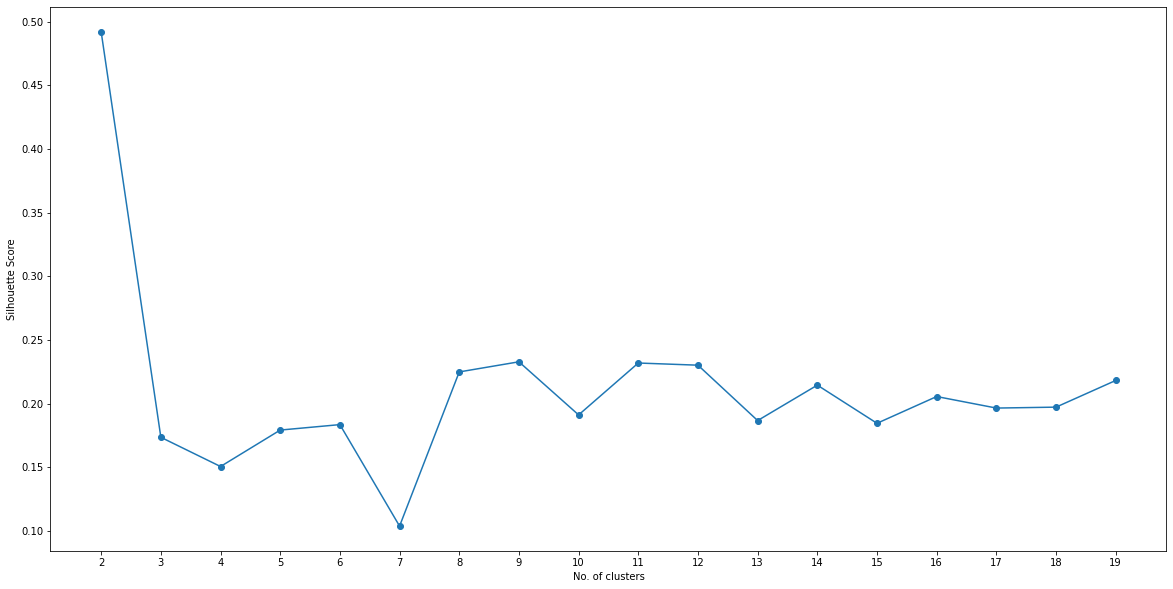

In [58]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

### From the graph the optimal number is found out to be considered for our clustering

In [59]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

2

### K-Means clustering for the optimal number of clusters

In [60]:
kclusters = opt

# Run k-means clustering
ngc = nagpur_grouped_clustering
kmeans = KMeans(n_clusters = ngp_clusters, init = 'k-means++', random_state = 0).fit(ngc)

In [61]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

### Creating a grand dataframe containing the necessary data

In [62]:
nagpur_merged = df
nagpur_merged = nagpur_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
nagpur_merged.dropna(inplace = True)
nagpur_merged['Cluster Labels'] = nagpur_merged['Cluster Labels'].astype(int)
nagpur_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mahal,21.14578,79.10713,16,Jewelry Store,Garden,Indian Restaurant,Hotel,Breakfast Spot,Electronics Store,Farm,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store
1,Sitabuldi,21.14609,79.08612,18,Shopping Mall,Indian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Fried Chicken Joint,Multiplex,Miscellaneous Shop,Platform,Electronics Store,Pizza Place
2,Dhantoli,21.13322,79.07947,14,Hotel,Shopping Mall,Train Station,Restaurant,Outdoors & Recreation,Indian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Lounge,North Indian Restaurant
3,Itwari,21.15390,79.11073,1,Jewelry Store,Dessert Shop,Fast Food Restaurant,Breakfast Spot,Train Station,Hotel,Hookah Bar,Halal Restaurant,Gym,Gift Shop
4,Mominpura,21.15709,79.09764,4,Lounge,Shoe Store,Wings Joint,Garden,Diner,Electronics Store,Farm,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store


### Visualizing the clusters

In [75]:
nagpur_lat = 21.1458
nagpur_lng = 79.0882

# Create map
map_clusters = folium.Map(location=[nagpur_lat, nagpur_lng], zoom_start=12.2)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(ngp_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nagpur_merged['Latitude'], nagpur_merged['Longitude'], nagpur_merged['Neighbourhood'], nagpur_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [74]:
val = 14
nagpur_merged.loc[nagpur_merged['Cluster Labels'] == (val - 1), nagpur_merged.columns[[0] + np.arange(4, nagpur_merged.shape[1]).tolist()]]




,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Dharampeth,Ice Cream Shop,Coffee Shop,Indian Restaurant,Clothing Store,Fast Food Restaurant,Plaza,Snack Place,Market,Park,Nightclub
19,Ravi Nagar,Clothing Store,Indian Restaurant,Lounge,Coffee Shop,Restaurant,Park,Tea Room,Athletics & Sports,Trail,Hookah Bar
25,Pratap Nagar,Coffee Shop,Snack Place,Restaurant,Indian Restaurant,Sandwich Place,Ice Cream Shop,Lounge,Gym,Plaza,Furniture / Home Store
32,Gokulpeth,Indian Restaurant,Ice Cream Shop,Clothing Store,Park,Coffee Shop,Market,Nightclub,Fast Food Restaurant,Plaza,Café
33,Giripeth,Ice Cream Shop,Indian Restaurant,Coffee Shop,Clothing Store,Fast Food Restaurant,Restaurant,Market,Park,Nightclub,Plaza
37,Gandhinagar,Snack Place,Ice Cream Shop,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Clothing Store,Market,Diner,Park,Café
